## Асинхронное программирование (asyncio)

**Асинхронное программирование** — это подход, при котором программа может выполнять несколько задач одновременно, не блокируя выполнение других задач.

**Asyncio** — это библиотека Python, которая предоставляет поддержку для написания однопоточных конкурирующих задач, используя корутины, многочисленные параллельные задачи и имплементацию сетевых клиентов и серверов.

Основные понятия:
1. **Корутины** — это специальные функции, которые могут приостанавливать и возобновлять своё выполнение.
2. **Эвент-луп** — это основной цикл, который управляет выполнением корутин.
3. **Задачи** — это объекты, которые представляют собой корутины, запущенные в эвент-лупе.
4. **Фьючерсы** — это объекты, которые представляют результат выполнения задачи.

In [ ]:
# Пример использования asyncio. Jupyter Notebook, эвент-луп уже запущен в фоновом режиме.
# Попытка вызвать asyncio.run() в таких условиях также приведет к ошибке.
import asyncio

async def task1():
    print("Начало задачи 1")
    await asyncio.sleep(2) # Приостановка на 2 секунды
    print("Завершение задачи 1")

async def task2():
    print("Начало задачи 2")
    await asyncio.sleep(1)  # Приостановка на 1 секунду
    print("Завершение задачи 2")

async def main():
    # Запуск задач одновременно
    await asyncio.gather(task1(), task2())

# Запуск эвент-лупа
asyncio.run(main())

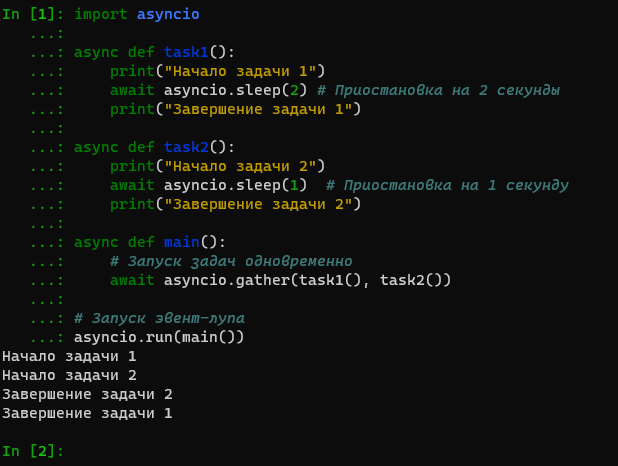

Асинхронные функции определяются с помощью ключевого слова async def. Эти функции могут приостанавливать и возобновлять своё выполнение, что позволяет другим функциям выполняться в промежутках между приостановками.

## Асинхронные HTTP-запросы с aiohttp

In [15]:
# Установка aiohttp
#pip install aiohttp

In [17]:
import aiohttp
import asyncio

In [ ]:
# Отправка GET-запроса
async def fetch_data(session, url):
    async with session.get(url) as response:
        return await response.text()

async def main():
    async with aiohttp.ClientSession() as session:
        url = 'https://api.github.com'
        html = await fetch_data(session, url)
        print(html)

asyncio.run(main())

Вывод

{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_search_url":"https://api.github.com/search/labels?q={query}&repository_id={repository_id}{&page,per_page}","notifications_url":"https://api.github.com/notifications","organization_url":"https://api.github.com/orgs/{org}","organization_repositories_url":"https://api.github.com/orgs/{org}/repos{?type,page,per_page,sort}","organization_teams_url":"https://api.github.com/orgs/{org}/teams","public_gists_url":"https://api.github.com/gists/public","rate_limit_url":"https://api.github.com/rate_limit","repository_url":"https://api.github.com/repos/{owner}/{repo}","repository_search_url":"https://api.github.com/search/repositories?q={query}{&page,per_page,sort,order}","current_user_repositories_url":"https://api.github.com/user/repos{?type,page,per_page,sort}","starred_url":"https://api.github.com/user/starred{/owner}{/repo}","starred_gists_url":"https://api.github.com/gists/starred","topic_search_url":"https://api.github.com/search/topics?q={query}{&page,per_page}","user_url":"https://api.github.com/users/{user}","user_organizations_url":"https://api.github.com/user/orgs","user_repositories_url":"https://api.github.com/users/{user}/repos{?type,page,per_page,sort}","user_search_url":"https://api.github.com/search/users?q={query}{&page,per_page,sort,order}"}

In [ ]:
# Отправка POST-запроса
async def send_data(session, url, data):
    async with session.post(url, json=data) as response:
        return await response.json()

async def main():
    async with aiohttp.ClientSession() as session:
        url = 'https://httpbin.org/post'
        data = {'key': 'value'}
        response_json = await send_data(session, url, data)
        print(response_json)

asyncio.run(main())

Вывод

{'args': {}, 'data': '{"key": "value"}', 'files': {}, 'form': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br', 'Content-Length': '16', 'Content-Type': 'application/json', 'Host': 'httpbin.org', 'User-Agent': 'Python/3.12 aiohttp/3.9.5', 'X-Amzn-Trace-Id': 'Root=1-67bf6a54-4184fb002d2977d5305b982b'}, 'json': {'key': 'value'}, 'origin': '5.227.52.116', 'url': 'https://httpbin.org/post'}

In [ ]:
# Параллельные запросы
async def fetch_data(session, url):
    async with session.get(url) as response:
        return await response.text()

async def main():
    async with aiohttp.ClientSession() as session:
        urls = [
            'https://api.github.com',
            'https://httpbin.org/get',
            'https://example.com'
        ]
        tasks = [fetch_data(session, url) for url in urls]
        results = await asyncio.gather(*tasks)
        for url, result in zip(urls, results):
            print(f"URL: {url}, Result: {result[:20]}...")

asyncio.run(main())

Вывод

URL: https://api.github.com, Result: {
  "current_user_ur...
URL: https://httpbin.org/get, Result: {
  "args": {},
  "...
URL: https://example.com, Result: <!doctype html>
<htm...